In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/hamin/Documents/bithumb_analysis/data/marketPrice.csv")

In [4]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [5]:
df

,Timestamp,Price
0,2018-05-01 00:00:00.491007,10101000.0
1,2018-05-01 00:00:01.491007,10101000.0
2,2018-05-01 00:00:02.491008,10101000.0
3,2018-05-01 00:00:03.491008,10101000.0
4,2018-05-01 00:00:04.491008,10105500.0
...,...,...
1977073,2018-05-31 23:59:55.072012,8314500.0
1977074,2018-05-31 23:59:56.072013,8314500.0
1977075,2018-05-31 23:59:57.072014,8314500.0
1977076,2018-05-31 23:59:58.072014,8314500.0


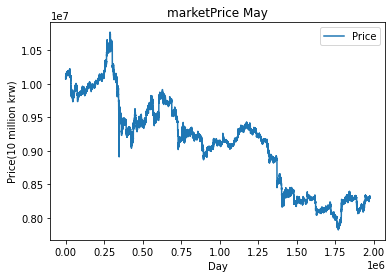

In [31]:
# 전체 시세
priceGraph = df.plot(title="marketPrice May", legend=True)
priceGraph.set_xlabel('Day')     # x축 정보 표시
priceGraph.set_ylabel('Price(10 million krw)')     # y축 정보 표시
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/marketPriceMay.png', dpi=300)

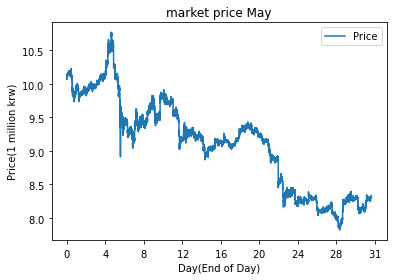

In [38]:
# 전체 시세
# x = ["{}월".format(i + 1) for i in range(12)]
priceGraph = df.plot(title="market price May", legend=True)
priceGraph.set_xlabel('Day(End of Day)')     # x축 정보 표시
priceGraph.set_ylabel('Price(1 million krw)')     # y축 정보 표시
# priceGraph.legend('price may')     # 범례 표시
# plt.xscale('linear')
# priceGraph.set_xticks([np.1,np.2,np.3,np.4,np.5,np.6,np.7,np.8,np.9,np.10,np.11,np.12,np.13,np.14,np.15,np.16,np.17,np.18,np.19,np.20,np.21,np.22,np.23,np.24,np.25,np.26,np.27,np.28,np.29,np.30,np.31])
priceGraph.set_xticklabels(['$0$','$0$','$4$','$8$','$12$','$16$','$20$','$24$','$28$','$31$'])
priceGraph.set_yticklabels(['$0$','$8.0$','$8.5$','$9.0$','$9.5$','$10.0$','$10.5$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/marketPriceMay.png', dpi=300)

In [39]:
## converting timestamp column type 'object' to 'datetime'
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [40]:
df['Timestamp_date']        = df['Timestamp'].dt.day          # 일(숫자)
df['Timestamp_hour']       = df['Timestamp'].dt.hour         # 시(숫자)
df['Timestamp_minute']     = df['Timestamp'].dt.minute       # 분(숫자)
df['Timestamp_second']     = df['Timestamp'].dt.second       # 초(숫자)

In [41]:
## creating 'hour - amount' connection
group_date_Price = df['Price'].groupby(df['Timestamp_date'])
group_hour_Price = df['Price'].groupby(df['Timestamp_hour'])
group_minute_Price = df['Price'].groupby(df['Timestamp_minute'])

In [42]:
# 날짜 별 가격 평균
group_date_Price.mean()

Timestamp_date
1     9.983750e+06
2     9.912874e+06
3     1.006568e+07
4     1.053211e+07
11    9.828027e+06
12    9.339018e+06
13    9.464058e+06
14    9.603536e+06
15    9.760064e+06
16    9.358174e+06
17    9.250623e+06
18    9.059795e+06
19    9.125568e+06
20    9.119890e+06
21    9.338899e+06
22    9.241376e+06
23    8.971551e+06
24    8.443337e+06
25    8.334930e+06
26    8.274118e+06
27    8.165265e+06
28    8.120023e+06
29    8.010549e+06
30    8.289454e+06
31    8.198665e+06
Name: Price, dtype: float64

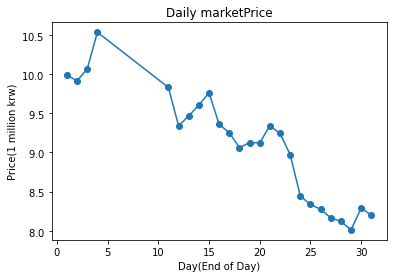

In [44]:
# date 별 시세 평균
datePriceGraph = group_date_Price.mean().plot(title="Daily marketPrice", marker='o')
datePriceGraph.set_xlabel('Day(End of Day)')     # x축 정보 표시
datePriceGraph.set_ylabel('Price(1 million krw)')     # y축 정보 표시
datePriceGraph.set_yticklabels(['$0$','$8.0$','$8.5$','$9.0$','$9.5$','$10.0$','$10.5$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/dailyMarketPrice.png', dpi=300)

In [45]:
# hour 별 가격 평균
group_hour_Price.mean()

Timestamp_hour
0     9.194210e+06
1     9.199636e+06
2     9.200768e+06
3     9.180525e+06
4     9.199030e+06
5     9.197997e+06
6     9.193351e+06
7     9.172179e+06
8     9.195778e+06
9     9.153287e+06
10    9.128114e+06
11    9.101347e+06
12    9.040086e+06
13    9.010940e+06
14    9.017853e+06
15    9.038429e+06
16    9.049805e+06
17    9.039727e+06
18    9.014318e+06
19    9.031587e+06
20    9.045241e+06
21    9.046666e+06
22    9.054040e+06
23    9.063973e+06
Name: Price, dtype: float64

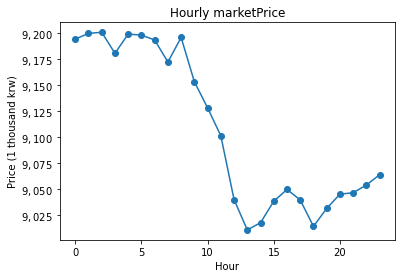

In [47]:
# hour 별 시세 평균
hourPriceGraph = group_hour_Price.mean().plot(title="Hourly marketPrice", marker='o')
hourPriceGraph.set_xlabel('Hour')
hourPriceGraph.set_ylabel('Price (1 thousand krw)')
hourPriceGraph.set_yticklabels(['$0$','$9,025$','$9,050$','$9,075$','$9,100$','$9,125$','$9,150$','$9,175$','$9,200$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/hourlyMarketPrice.png', dpi=300)

In [48]:
# 분 당 가격 평균
group_minute_Price.mean()

Timestamp_minute
0     9.110550e+06
1     9.104535e+06
2     9.107369e+06
3     9.109922e+06
4     9.111030e+06
5     9.106424e+06
6     9.107230e+06
7     9.106176e+06
8     9.106909e+06
9     9.107727e+06
10    9.115871e+06
11    9.113396e+06
12    9.117003e+06
13    9.114870e+06
14    9.116348e+06
15    9.101598e+06
16    9.105087e+06
17    9.113667e+06
18    9.111585e+06
19    9.105371e+06
20    9.106799e+06
21    9.106659e+06
22    9.108842e+06
23    9.106634e+06
24    9.105787e+06
25    9.104875e+06
26    9.105533e+06
27    9.105806e+06
28    9.104502e+06
29    9.110959e+06
30    9.099350e+06
31    9.104049e+06
32    9.113459e+06
33    9.112461e+06
34    9.104769e+06
35    9.108370e+06
36    9.110820e+06
37    9.113049e+06
38    9.115129e+06
39    9.103764e+06
40    9.108913e+06
41    9.103378e+06
42    9.106829e+06
43    9.111792e+06
44    9.106024e+06
45    9.103877e+06
46    9.103697e+06
47    9.107470e+06
48    9.094390e+06
49    9.105109e+06
50    9.101246e+06
51    9.102150

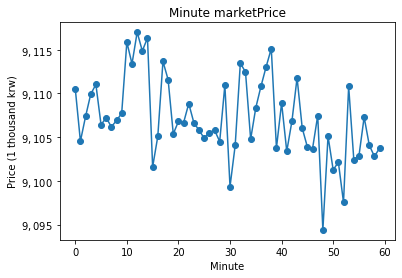

In [50]:
# min 별 시세 평균
minutePriceGraph = group_minute_Price.mean().plot(title="Minute marketPrice", marker='o')
minutePriceGraph.set_xlabel('Minute')
minutePriceGraph.set_ylabel('Price (1 thousand krw)')
minutePriceGraph.set_yticklabels(['$0$','$9,095$','$9,100$','$9,105$','$9,110$','$9,115$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/minuteMarketPrice.png', dpi=300)